# AEROFIT CASE STUDY
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories
to cater to the needs of all categories of people.

# OBJECTIVE
The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and
compute all conditional and marginal probabilities along with their insights/impact on
the business.

# IMPORT REQUIRED LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Summary




In [7]:
data1=pd.read_csv('aerofit_treadmill.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
data1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [9]:
data1.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


INSIGHTS:
*  Data Shape : 180 rows and 9 columns with No null values
*  Data Type of each Category looks good
*  3 Unique Products : KP281 is the most frequent product
*  Males are more in numbers i.e 104 and rest are Females  
*  Married people (107) considerably buying treadmills
*  Average Age is 29 with 75% of audience have an age less than or equal to 33. Minimum age is 18 and maximum is 50
*  Average years of Education is 16 which is equivalent to 75% of the audience
*  Standard Deviation is quite high in case of 'Income' and 'Miles' which must be due to outliers     


# Outliers Detection:
Used Boxplot to detect outliers in each category


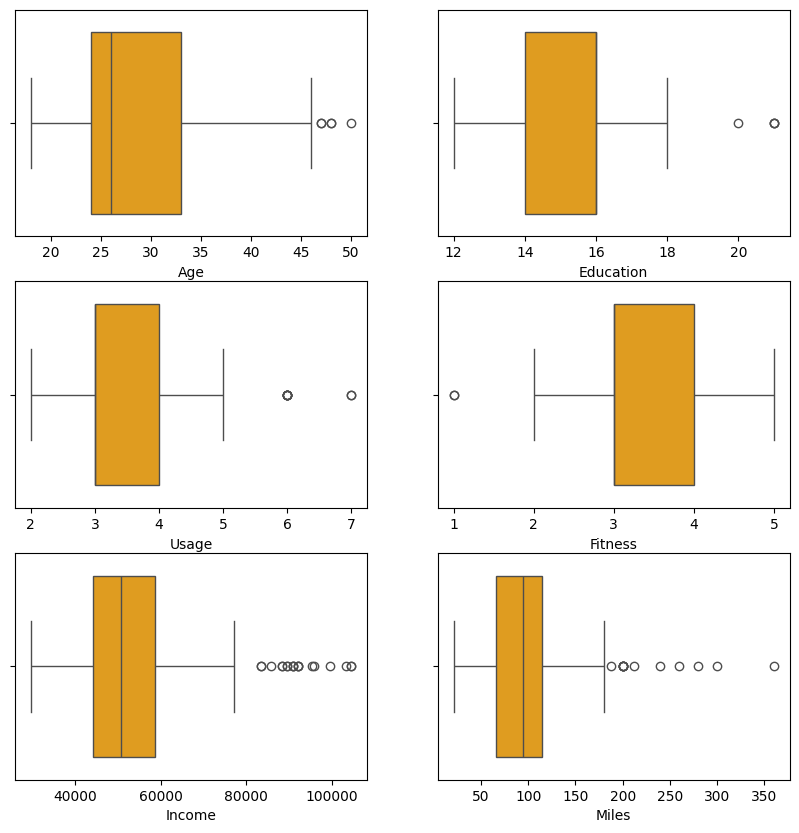

In [10]:
fig, axis = plt.subplots(3, 2, figsize=(10, 10))
#fig.subplots_adjust(top=1.0)
sns.boxplot(data=data1, x="Age", orient='h', ax=axis[0,0],color='orange')
sns.boxplot(data=data1, x="Education", orient='h', ax=axis[0,1],color='orange')
sns.boxplot(data=data1, x="Usage", orient='h', ax=axis[1,0],color='orange')
sns.boxplot(data=data1, x="Fitness", orient='h', ax=axis[1,1],color='orange')
sns.boxplot(data=data1, x="Income", orient='h', ax=axis[2,0],color='orange')
sns.boxplot(data=data1, x="Miles", orient='h', ax=axis[2,1],color='orange')
plt.show()

INSIGHTS:

- Income and Miles Categories have got more outliers
- Age / Education / Usage and fitness have got negligible outliers
- Since there are outliers, we will consider median of the attributes to derive correct inferences and reduce the effect of outliers

# Univariate Analysis / Marginal Probability:
Contribution of Each Categorical & Continuous data


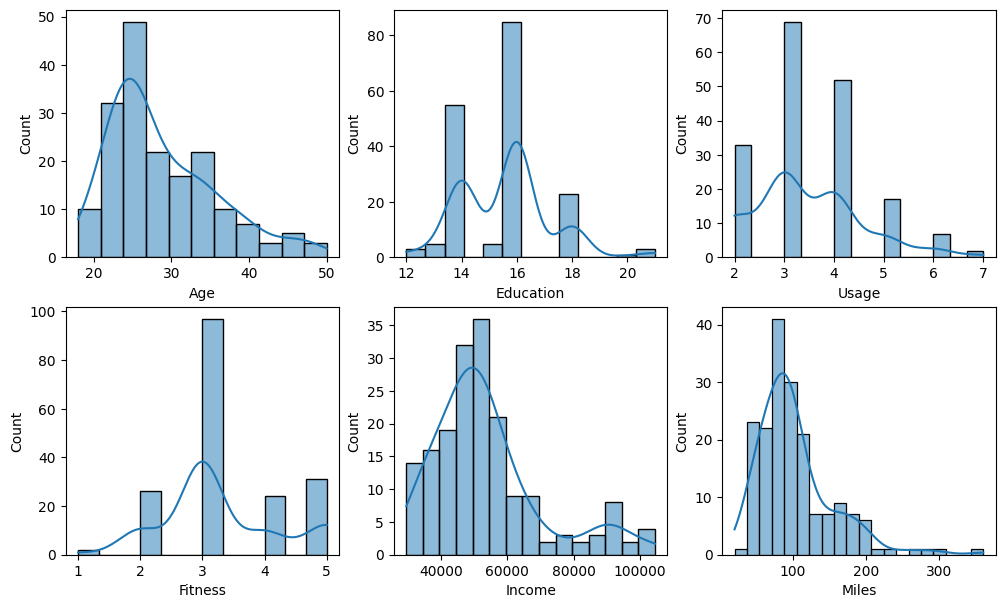

In [11]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))
fig.subplots_adjust(top=1.2)
sns.histplot(data=data1, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=data1, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=data1, x="Usage", kde=True, ax=axis[0,2])
sns.histplot(data=data1, x="Fitness", kde=True, ax=axis[1,0])
sns.histplot(data=data1, x="Income", kde=True, ax=axis[1,1])
sns.histplot(data=data1, x="Miles", kde=True, ax=axis[1,2])
plt.show()

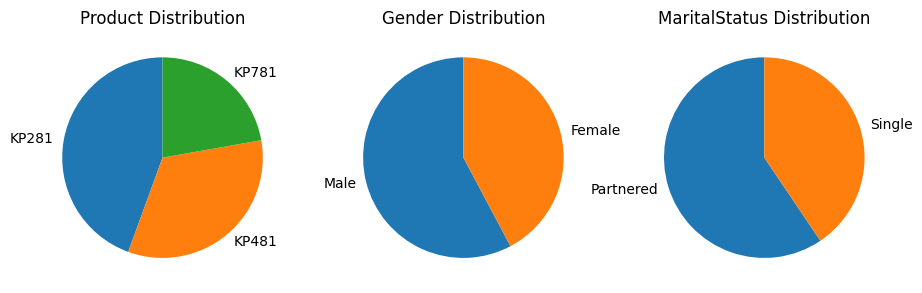

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (11, 4))
ax[0].pie(data1['Product'].value_counts(),labels=data1['Product'].value_counts().index,startangle=90)
ax[0].set_title("Product Distribution")
ax[1].pie(data1['Gender'].value_counts(),labels=data1['Gender'].value_counts().index,startangle=90)
ax[1].set_title("Gender Distribution")
ax[2].pie(data1['MaritalStatus'].value_counts(),labels=data1['MaritalStatus'].value_counts().index,startangle=90)
ax[2].set_title("MaritalStatus Distribution")
plt.show()

Marginal Probability:

To obtain share of each sub-category in Product / Gender / Marital Status

In [13]:
data1['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [14]:
data1['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [15]:
data1['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [16]:
data1['Gender'].value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

In [17]:
data1['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [18]:
data1['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

INSIGHTS:

- KPI281 is the most sold product with 44.44% followed by KPI481 (33.33%) and KPI781 (22.22%)
- Considering Gender, Male share is 57.78% followed by 42.22% of Females
- Married people with 59.44% buy Treamills more than singles with 40.56%
- Maximum audience lies in the age group of around 25 years
- Most of the audience have an education of 16 years
- 3 times is what most of the customers plan to use Treadmill each week
- Most of the audience have a fitness level of 3
- Majority of people have an income of around 50k
- Majority of audience plan to walk / run around 90-100 miles in a week


# Bivariate Analysis / Conditional Probability


Understanding Gender Distribution on Purchase of Each Category of Treadmill

In [19]:
pd.crosstab(data1['Gender'], data1['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [20]:
pd.crosstab(data1['Gender'], data1['Product'], normalize=True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


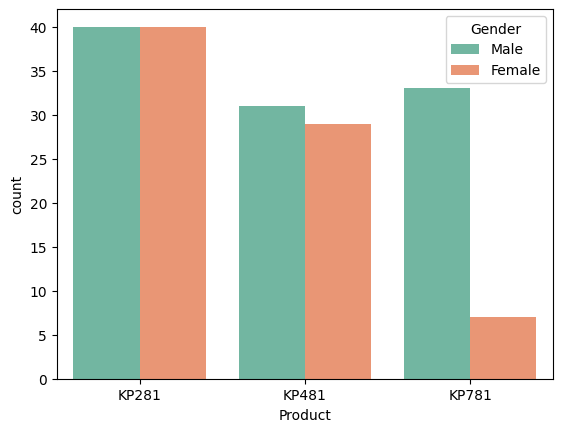

In [21]:
sns.countplot(data=data1,x='Product',hue='Gender',palette='Set2')
plt.show()

INSIGHTS:

* Ratio of Males and Females buying an entry level Treadmill KP281 is same
* Males are slightly higher than Females in buying a mid-level product KP481
* Males mostly buy a high end Treadmill KP781 with 18% of the overall sale w.r.t Female's 4% only



Understanding Effect of Marital Status on Purchase of Each Category of Treadmill

In [22]:
pd.crosstab(data1['MaritalStatus'], data1['Product'])

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [23]:
pd.crosstab(data1['MaritalStatus'], data1['Product'],normalize=True)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.266667,0.200000,0.127778
Single,0.177778,0.133333,0.094444


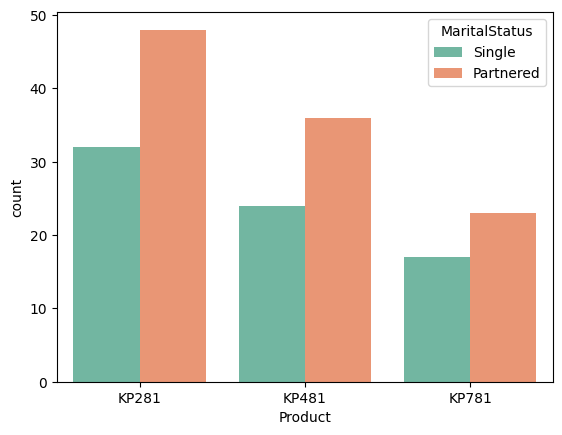

In [24]:
sns.countplot(data=data1,x='Product',hue='MaritalStatus',palette='Set2')
plt.show()

INSIGHTS:

* Married population clearly dominates Singles while buying Treadmills of any Category
* The difference between buying capacity of Married w.r.t singles is maximum in case of Entry level Treadmill i.e KP281 followed by KP481 and then KP781
* Married and Singles both mostly buy entry level Treadmill KP281 which is economical

# Distribution of Each Attribute on all 3 Products

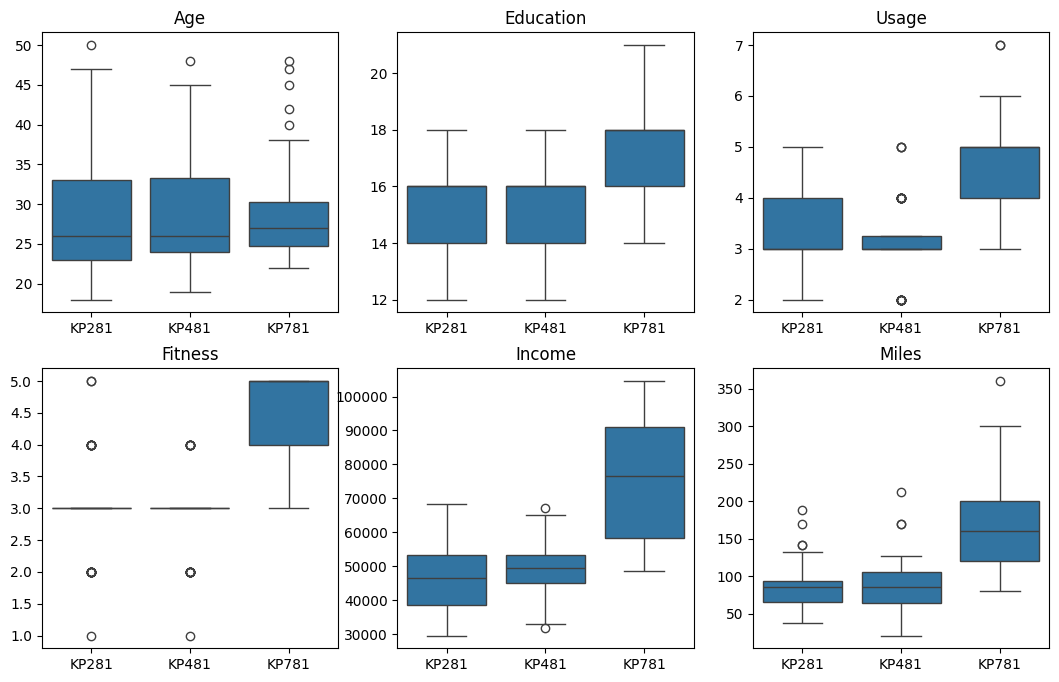

In [25]:
plt.figure(figsize=(13,8))
plt.subplot(2,3,1)
sns.boxplot(data=data1,x='Product',y='Age')
plt.title("Age")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,3,2)
sns.boxplot(data=data1,x='Product',y='Education')
plt.title("Education")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,3,3)
sns.boxplot(data=data1,x='Product',y='Usage')
plt.title("Usage")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,3,4)
sns.boxplot(data=data1,x='Product',y='Fitness')
plt.title("Fitness")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,3,5)
sns.boxplot(data=data1,x='Product',y='Income')
plt.title("Income")
plt.xlabel("")
plt.ylabel("")

plt.subplot(2,3,6)
sns.boxplot(data=data1,x='Product',y='Miles')
plt.title("Miles")
plt.xlabel("")
plt.ylabel("")

plt.show()

INSIGHTS

* Age:
  1.   Most of the customers lie in the age group of 25-30 for all three products
  2.   The advanced level Treadmill KP781 have got significant exceptions from the customers in the age group of 35-50
* Education:
  1. Entry level and Mid level Treadmill show same Education level mostly from 14-16
  2. The higher Education level 16-18 are more likely to buy advanced level Treadmill KP781
* Usage:
  1. Customers using Treadmill 3-4 times in a week are buying Entry level Treadmill KP281
  2. Customers using Treadmill 3 times in a week are more likely to buy KP481
  3. Customers using Treadmill 4-5 times in a week are buying advanced level Treadmill KP781
* Fitness:

     Customers who are fitness freak with a fitness level of 4-5 are mostly buying advanced level Treadmill KP781
* Income:
  1. Customers with income group of 40-50k are buying entry level Treadmill
  2. Customers with income of around 50k are likly to buy mid-level Treadmill
  3. Customers with income group of 60-90k are buying advanced level Treadmill
* Miles:
  1. Customers who walk / run average of 90 miles per week are buying KP281 and KP481
  2. Customers who walk / run around 150 miles per week are more likely to buy advanced level Treadmill KP781



# Gender Wise Distribution of Each Attribute on the sale of Products

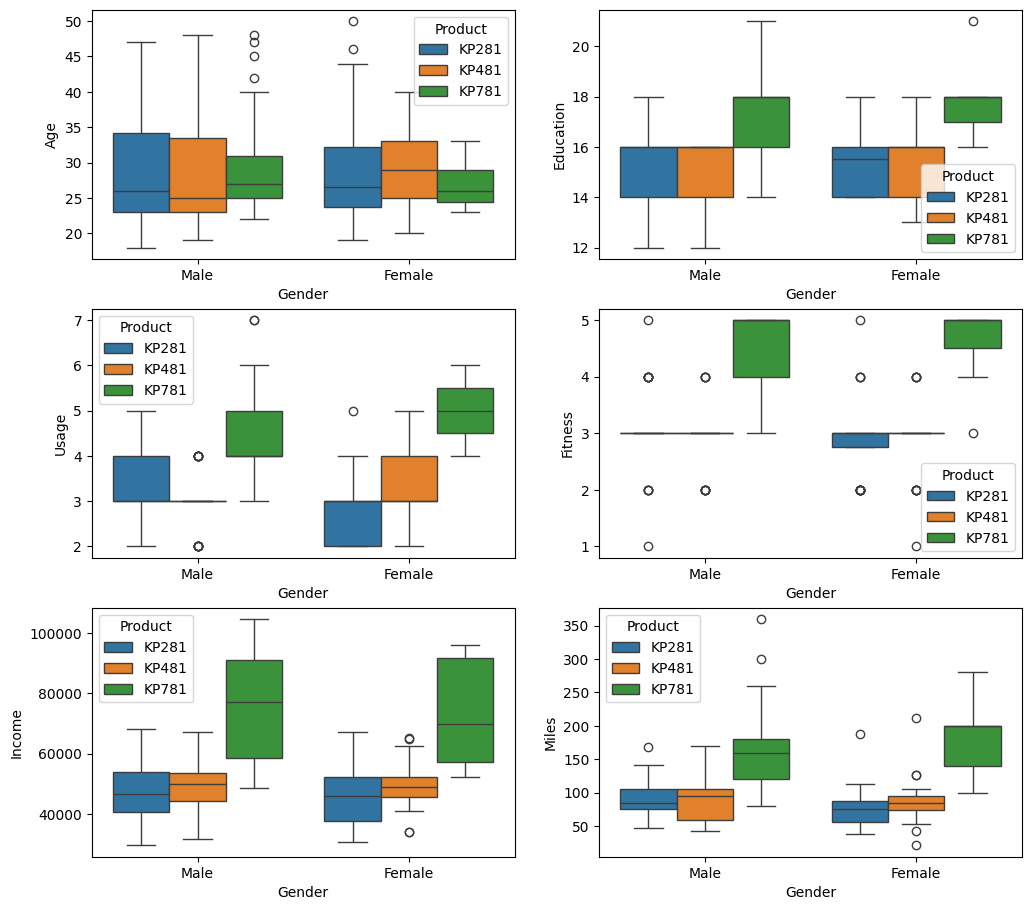

In [26]:
Cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(3,2, figsize=(12, 11))
#fig.subplots_adjust(top=1)
cnt = 0
for i in range(3):
  for j in range(2):
    sns.boxplot(data=data1,x='Gender', y=Cols[cnt], hue='Product',ax=axs[i,j])
    cnt += 1

INSIGHTS

* AGE:
  1. Females around 30 yearsof age are more likely to buy mid level Treadmill
  2. Males around 27 years of age are buying advanced end Treadmill
* Education:
  1. Males with higher education level likely to buy KP781 and similar is the case with females.
  2. Buying pattern is same for both males and females in case of entry and mid level Treadmills
* Usage:

  Males and Females with higher usage of 4-5 times a week are buying advanced Treadmill KP781
* Fitness:
  
  Both Males and Females having higher fitness levels are likely to buy advanced end Treadmill KP781
* Income:
  
  Males and Females in higher income groups are buying KP781 and with lower income groups are buying entry and mid level Treadmills
* Miles:
  
  Both males and females having covering more miles in a week are buying advanced end Treadmills



#Correlation

Understanding Connections among each Category which will help us in Customer Profiling

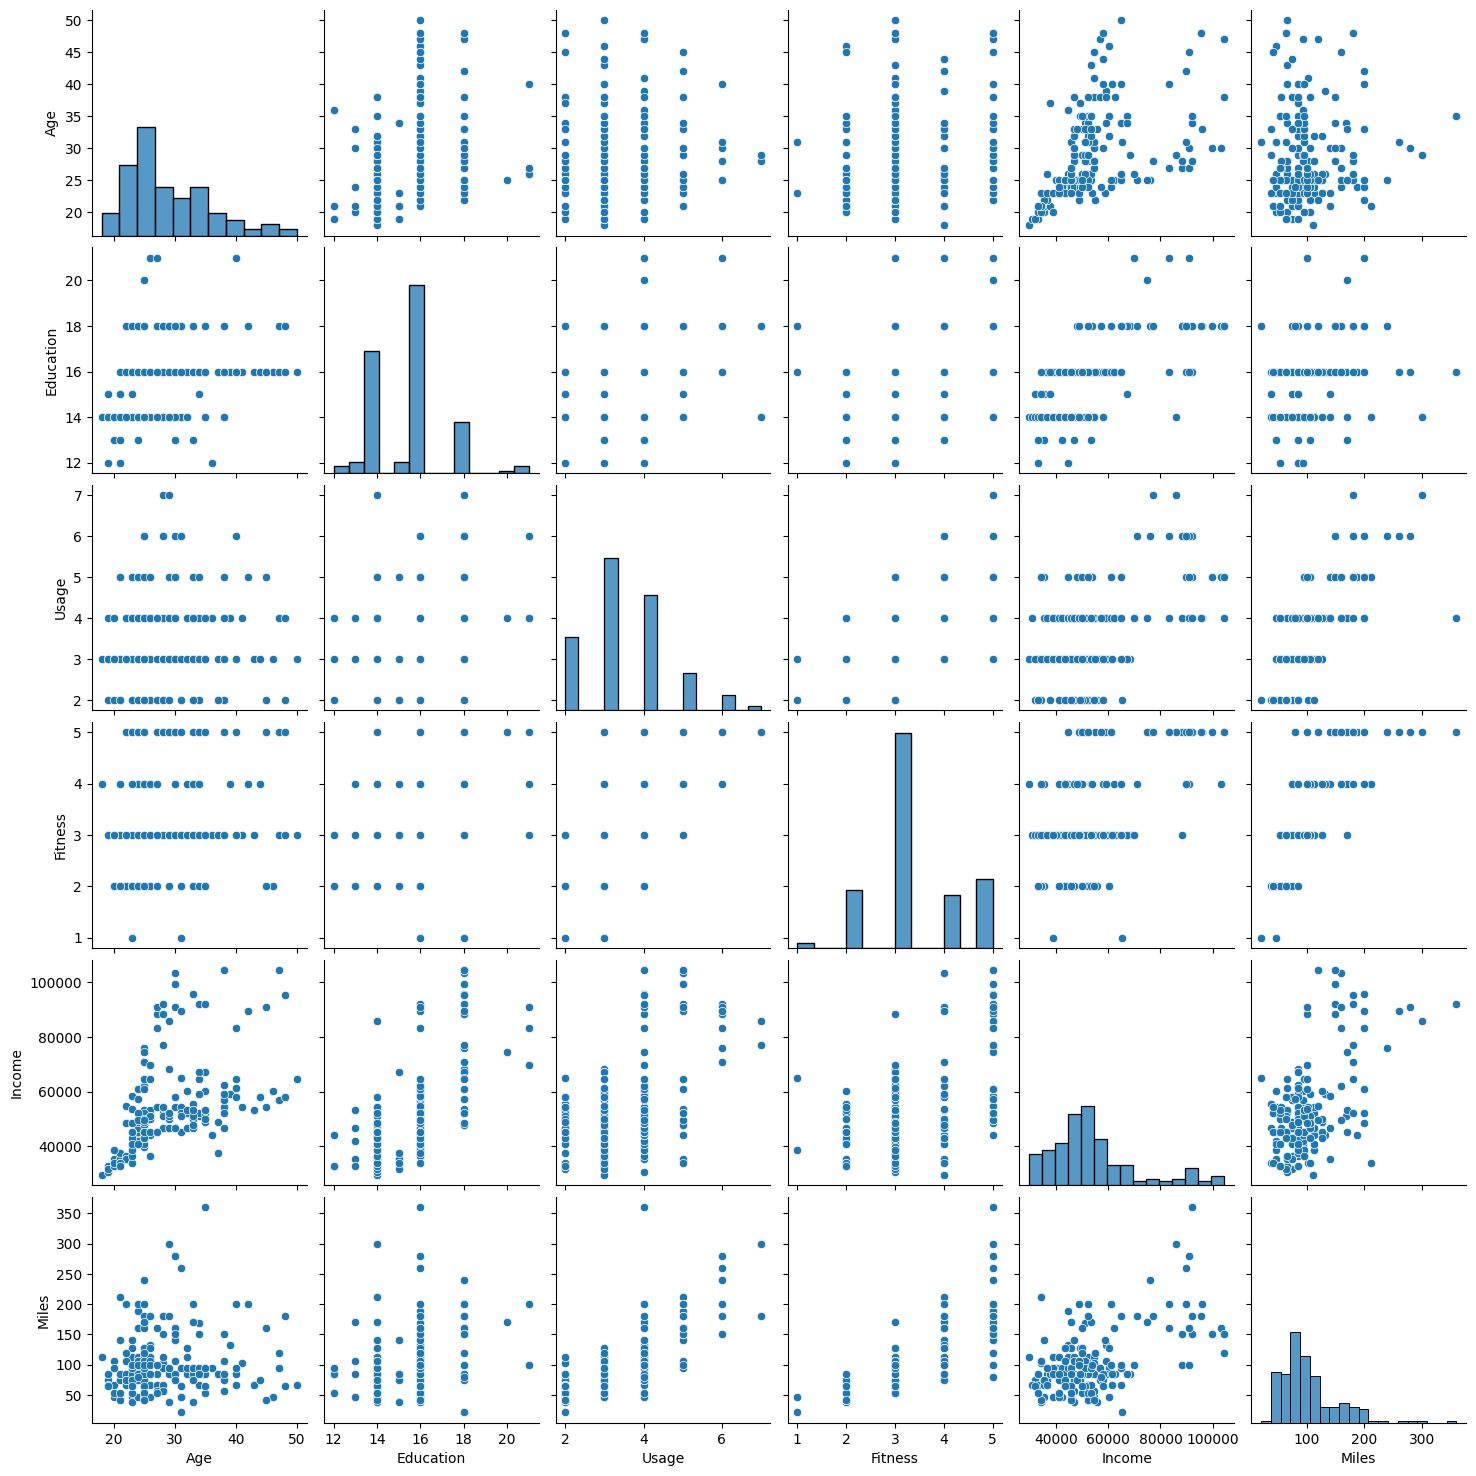

In [27]:
sns.pairplot(data=data1)

In [29]:
data1.select_dtypes(include=[np.number]).corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

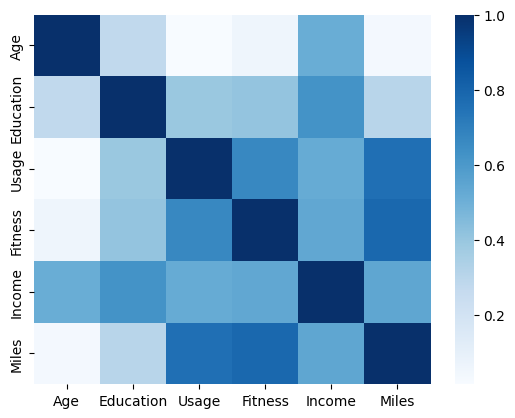

In [30]:
sns.heatmap(data1.select_dtypes(include=[np.number]).corr(),cmap='Blues')

INSIGHTS:

- Less variance in income is observed in case of lower ages as compared to higher ages
- Customers with lower income run /walk lesser miles w.r.t higher income group
- Fitness is strongly related to miles covered by the customers
- Customer's education is strongly related to Income
- Usage per week is strongly related to miles covered by customer

# Recommendations / Customer Profiling

Target Group:
1. Males:
*  Young Male:

  Age around 25 years is buying more Entry level and mid level Treadmills. We can introduce more products in this price range targeting this group and motivating them to buy through some sale schemes. This Target group shall give voulme sales than margins. Later when this male purchasing power increases ,he can buy our high end model. It can make way for our advanced end products and customer will remain loyal to our brand.
*  Mid Aged Male:

  They tend to buy advanced end Treadmill KP 781 which shows their purchasing power is increased and how seriously they are considering their fitness. This Target group can give more revenue than volume sales. So having a marketing plan around it would defintely help increase revenue
* Educated Male:

  Males with higher education level i.e 16-18 buy advanced end Treadmills than with the ones with education level 14-16 who buy mostly low level and mid level equipment. We can market our product and introduce schemes basis this information. For Ex. we can have corporate offers show casing our high end treadmills, considering the fact that it will be our customer base for advanced end models.
* Fitness Freak Male:
  
  Data clearly shows the males with higher usage and higher fitness levels are clearly buying advanced end model KP781 only. We can find this target group in gyms, fitness centers.. for sportspersons, atheletes. He is the guy who is serious for his fitness and spending time and money on it. We need to sit with marketing team to have a plan to target this group and generate revenue.
* Higher / Lower Income Male:

  There is a residential or corporate area and we know that this place mostly higher income or lower income males are found. Basis this information we can device a marketing plan to push our products accordingly so that we do not waste marketing budget for higher end product where there are lower income males.


2.   Females:
* Young / Mid-Aged Females:

Mostly Females in the age bracket of 25-30 are buying KP481 followed by KP281 which clearly shows our target group and how can we have a plan to pitch this group. 38% of females combined are buying KP281 andf KP481 which shows the potential this group have and the marketing effort we need to put for them.

* High Educated Female:

Female with higher education level is buying advanced end Treadmill and the one with lower education level low end and mid end product. We can have a marketing plan around it accordingly.

* Fitness Freak Females:

Females with higher usage and high fitness level are clearly buying advanced end Treadmill KP781. We can identify localities or corporates which there this TG is found like gyms , fitness centers.. and plan marketing around it accordingly.

* High Income Females:
This group may find similarity with above group since these are the females who are buying advanced Treadmill only ,which means they have the purchasing power and they are serious for their fitness. We can identify such localities and societies and plan marketing event around them.

3. Married / Single:

It is observed that Singles are mainly buying low end Treadmills KP281 and KP481 which are less costly. It can be due to the reasons that most of them are students or have just started working and their purchasing power is less. This group can easily be identified near colleges / hostels where marketing can be planned or events can be planned to motivate them for their fitness and buy our economical Treadmills. We can introduce more models around this segment which will definitely help generate revenue ,although not much margin but volumes will be high. and if our quality is good he /she will be our future customer for our high end models.
Since many married people are buying our Treadmills mostly KP281. That infers that there is big scope of introducing more models around it since mane married and singles are buying low end Treadmills due to cost involved.




Recommendations Summary:

- KP281 is recommended for males or females, married and singles in the age group of 24-34,education level of 14-16, usage in males 3-4, income 40-50k and miles covered between 50-100
- KP481 is recommended for ones having age between 24-34,education level 14-16, female's usage 3-4 times in a week, income around 50k and miles covered around 100
- KP781 is recommended for ones with age between 24-34, education between 16-18 levels, usage 4-5 times in a week, fitness level between 4 and 5, income between 60k -90k and miles covered between 100-200
- Considering above Customer Profiling and socio-economic factors we can clearly plan a marketing strategy around each Target Group.
- Above analysis shows that there is big market for entry level products which account for almost 78% of the sales. It is a big opportunity to get customer on board and then with great experience we are creating base for our advanced Treadmills
- Basis above information we can target our customers through digital media. By having customer profiles from some agency and planning social media interactions ,youtube ..etc
- Basis on the demography shared above we can plan some fitness event in that localty or area and accordingly pitch our products.
- With information and actionables shared we can definitely capture market share and increase our revenue
